In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.manifold import TSNE

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
df= pd.read_csv("CSV_Informacion_Categorizada/cont_sent_CR_PE_MX_UY.csv", sep ="|")
df

,Unnamed: 0,Content,Sentiment
0,0,@NoilyMV yo soy totalmente puntual,NONE
1,1,@SandraCauffman Hola Sandrita. No le habia des...,P
2,2,Si andan haciendo eso mejor se quedaran callad...,N
3,3,Que pereza quiero choco banano,N
4,4,"@robertobrenes Bueno, no es tanto lo mayor com...",N
...,...,...,...
3670,938,@AmorAKilates @Roocio_Mk si me pasa lo mismo!,NONE
3671,939,@clauchoarrionda pquno ladra y ls demas retwitean,NEU
3672,940,A mi desayuno le hizo falta un alfajor podrida...,N
3673,941,Viste cuando necesitas que alguien te escuche ...,N


In [23]:
# Vizualizar cuantas valoraciones tenemos
print(df.groupby('Sentiment').size())

Sentiment
N       1410
NEU      532
NONE     694
P       1039
dtype: int64


In [24]:
df.describe()

,Unnamed: 0
count,3675.000000
mean,462.663946
std,271.316143
min,0.000000
25%,229.000000
50%,459.000000
75%,688.500000
max,988.000000


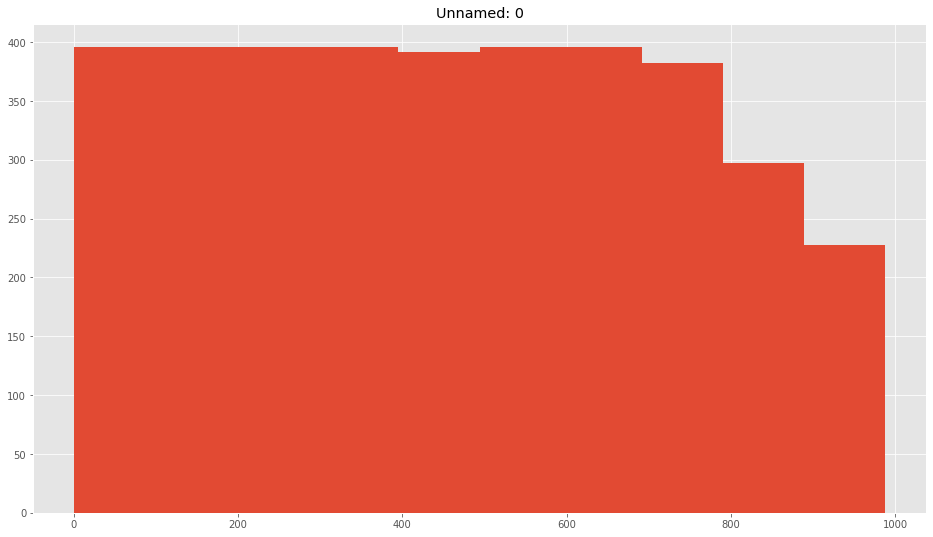

In [25]:
df.hist()
plt.show()

/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


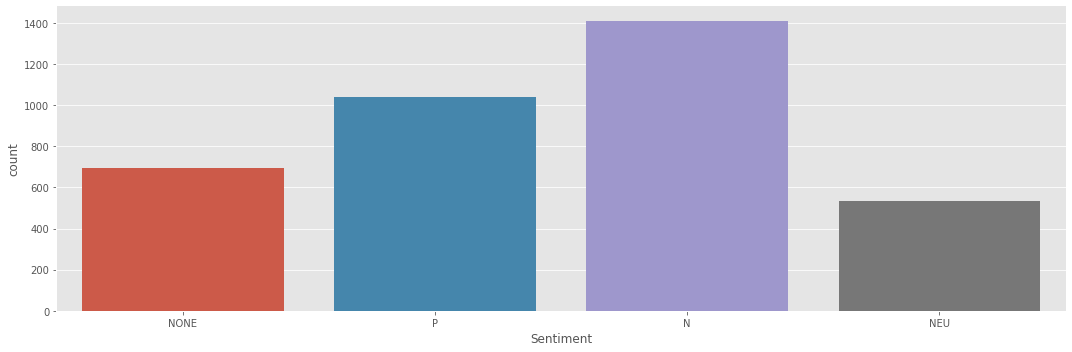

In [26]:
sb.factorplot('Sentiment',data=df,kind="count", aspect=3)

In [27]:
countW = []
# Conteo de palabras
for i in df.Content.tolist():
    countW.append(len(i.split()))
dfc = df.assign(countW = countW)
dfc

,Unnamed: 0,Content,Sentiment,countW
0,0,@NoilyMV yo soy totalmente puntual,NONE,5
1,1,@SandraCauffman Hola Sandrita. No le habia des...,P,25
2,2,Si andan haciendo eso mejor se quedaran callad...,N,22
3,3,Que pereza quiero choco banano,N,5
4,4,"@robertobrenes Bueno, no es tanto lo mayor com...",N,24
...,...,...,...,...
3670,938,@AmorAKilates @Roocio_Mk si me pasa lo mismo!,NONE,7
3671,939,@clauchoarrionda pquno ladra y ls demas retwitean,NEU,7
3672,940,A mi desayuno le hizo falta un alfajor podrida...,N,14
3673,941,Viste cuando necesitas que alguien te escuche ...,N,13


In [28]:
#prepara los datos 
X = dfc[['countW']].values
y = dfc['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Se crea el clasificador
n_neighbors = 16

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.36
Accuracy of K-NN classifier on test set: 0.37


In [30]:
#precision del modelo
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[293  14   0  43]
 [107   5   0  22]
 [131  11   0  17]
 [226  11   0  39]]
              precision    recall  f1-score   support

           N       0.39      0.84      0.53       350
         NEU       0.12      0.04      0.06       134
        NONE       0.00      0.00      0.00       159
           P       0.32      0.14      0.20       276

    accuracy                           0.37       919
   macro avg       0.21      0.25      0.20       919
weighted avg       0.26      0.37      0.27       919



/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

([<matplotlib.axis.XTick at 0x7f11a0839210>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

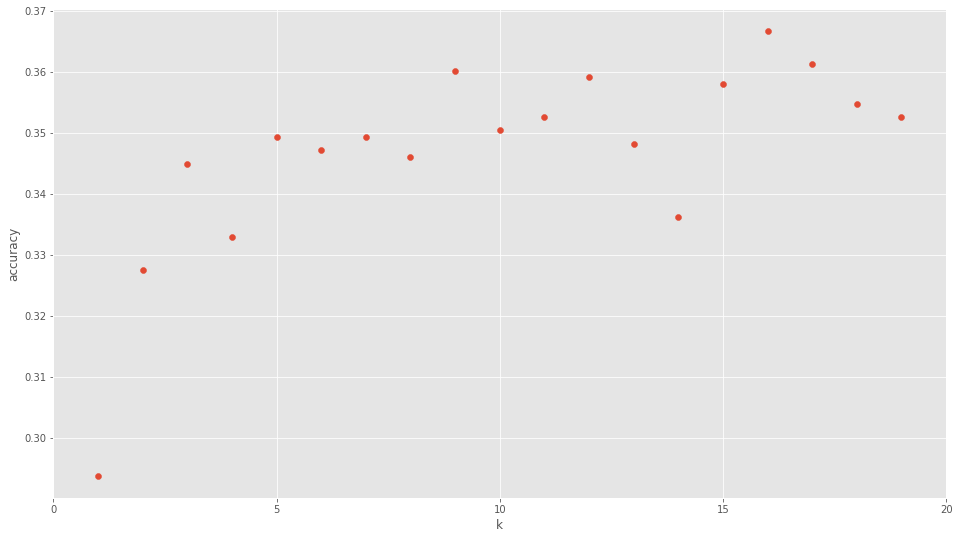

In [31]:
#GRafica con clasificación obtenida con mayor precision en 16
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [34]:
import pickle

In [35]:
pickle.dump(knn, open('ModelosAlgoritmos/knn_modelo.sav', 'wb'))


In [ ]:
#https://colab.research.google.com/github/romellfudi/LimaTweets_NLP_TFIDF/blob/master/Notebook.ipynb#scrollTo=flC9xelITdrw